### Time series analysis

#### Data collection

In [1]:
ls

app.py                      S&P_resources.zip
S&P_resources/              stock_price_analysis.ipynb


In [2]:
ls 'S&P_resources/'

individual_stocks_5yr/                 Stock_price_analysis_Shan_Singh.ipynb


In [3]:
pwd

'/Users/rubisc/workspace/data_analytics_real_world_projects/project_2_time_series_analysis'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import glob # used for finding all the pathnames matching a specified pattern, following the rules used by the Unix shell.

In [6]:
individual_stocks_path = r"/Users/rubisc/workspace/data_analytics_real_world_projects/project_2_time_series_analysis/S&P_resources/individual_stocks_5yr/"

In [7]:
# glob.glob(individual_stocks_path + "*csv")

In [8]:
len(glob.glob(individual_stocks_path + "*csv"))

505

In [9]:
company_list = [individual_stocks_path + "AAPL_data.csv", 
                individual_stocks_path + "AMZN_data.csv",
                individual_stocks_path + "GOOG_data.csv",
                individual_stocks_path + "MSFT_data.csv",
               ]

In [10]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = current_df.append(all_data, ignore_index=True)

In [12]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [13]:
all_data.shape

(4752, 7)

In [14]:
tech_list = sorted(all_data['Name'].unique())
tech_list

['AAPL', 'AMZN', 'GOOG', 'MSFT']

#### next category here

In [15]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [16]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [17]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [18]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [19]:
# all_data['date']

In [20]:
# sample_apple = all_data[all_data['Name'] == 'AAPL'].head(200)
# print(sample_apple)

#### What was the change in stock over time?

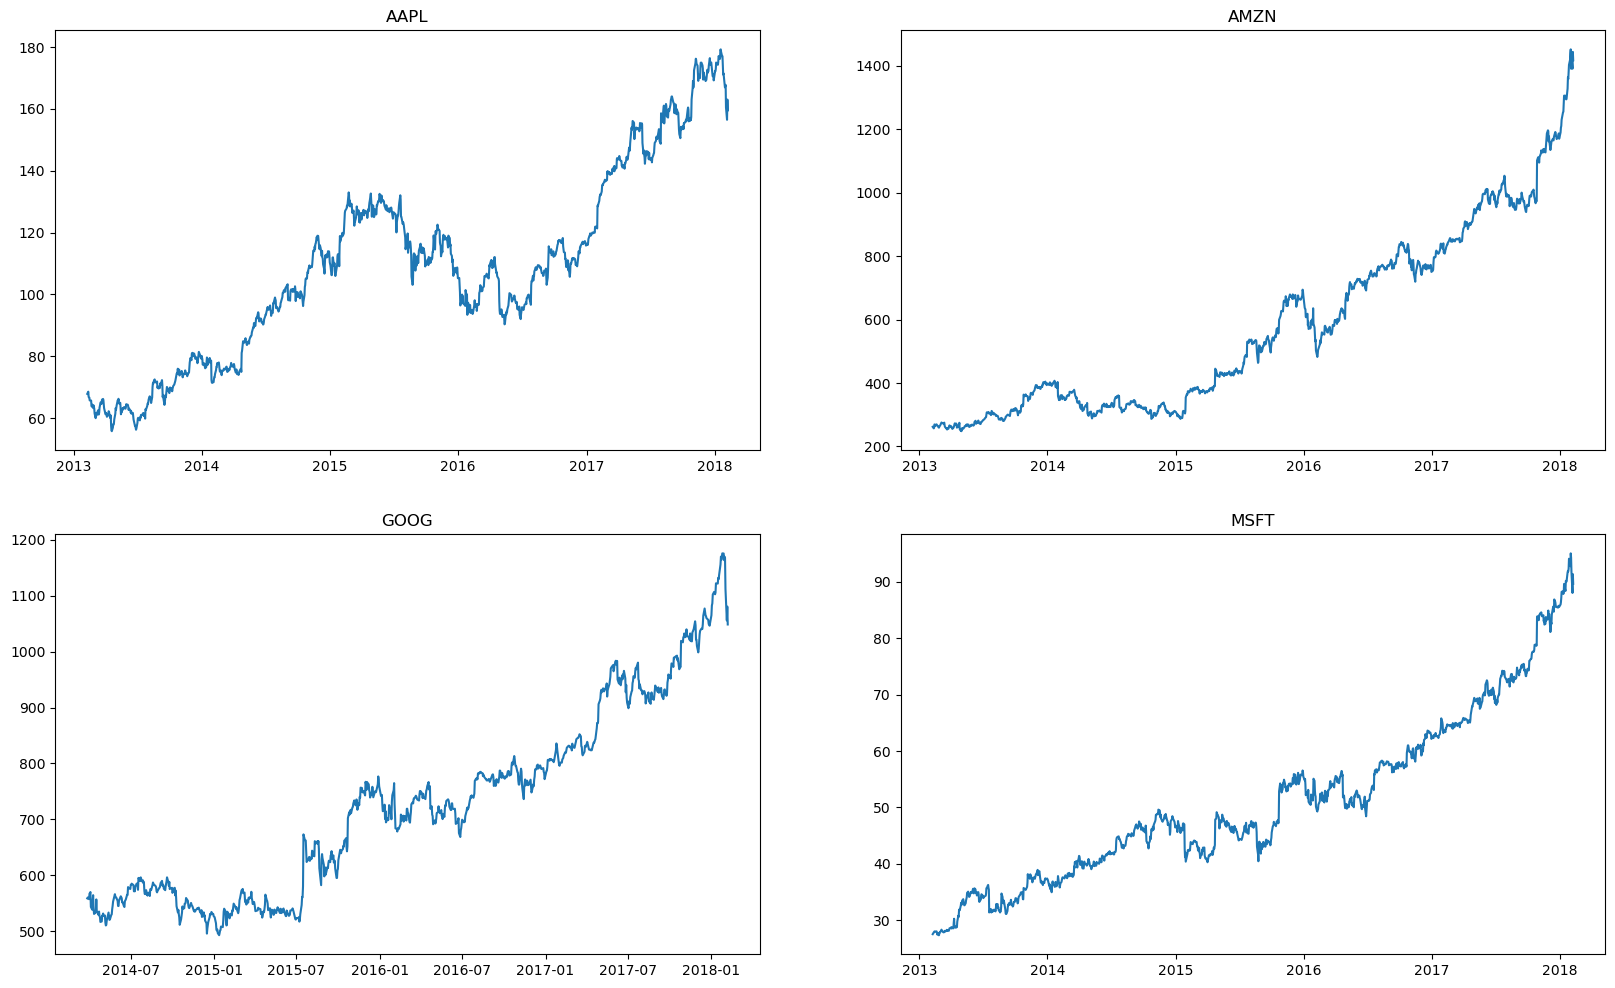

In [21]:
plt.figure(figsize=(20, 12))

for index, company in enumerate(tech_list, start=1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

#### What was the moving average of the various stocks? (the average change in the data)

In [22]:
all_data['close'].rolling(window=10).mean()

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
4747    171.948
4748    170.152
4749    168.101
4750    166.700
4751    165.232
Name: close, Length: 4752, dtype: float64

In [23]:
all_data['close'].rolling(window=10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [24]:
new_data = all_data.copy()

In [25]:
ma_day = [10, 20, 50]

for ma in ma_day:
    new_data['close_' + str(ma)] = new_data['close'].rolling(ma).mean()

In [26]:
new_data.tail(3)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4749,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [27]:
new_data.set_index('date', inplace=True)

In [28]:
new_data.tail(3)

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [29]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

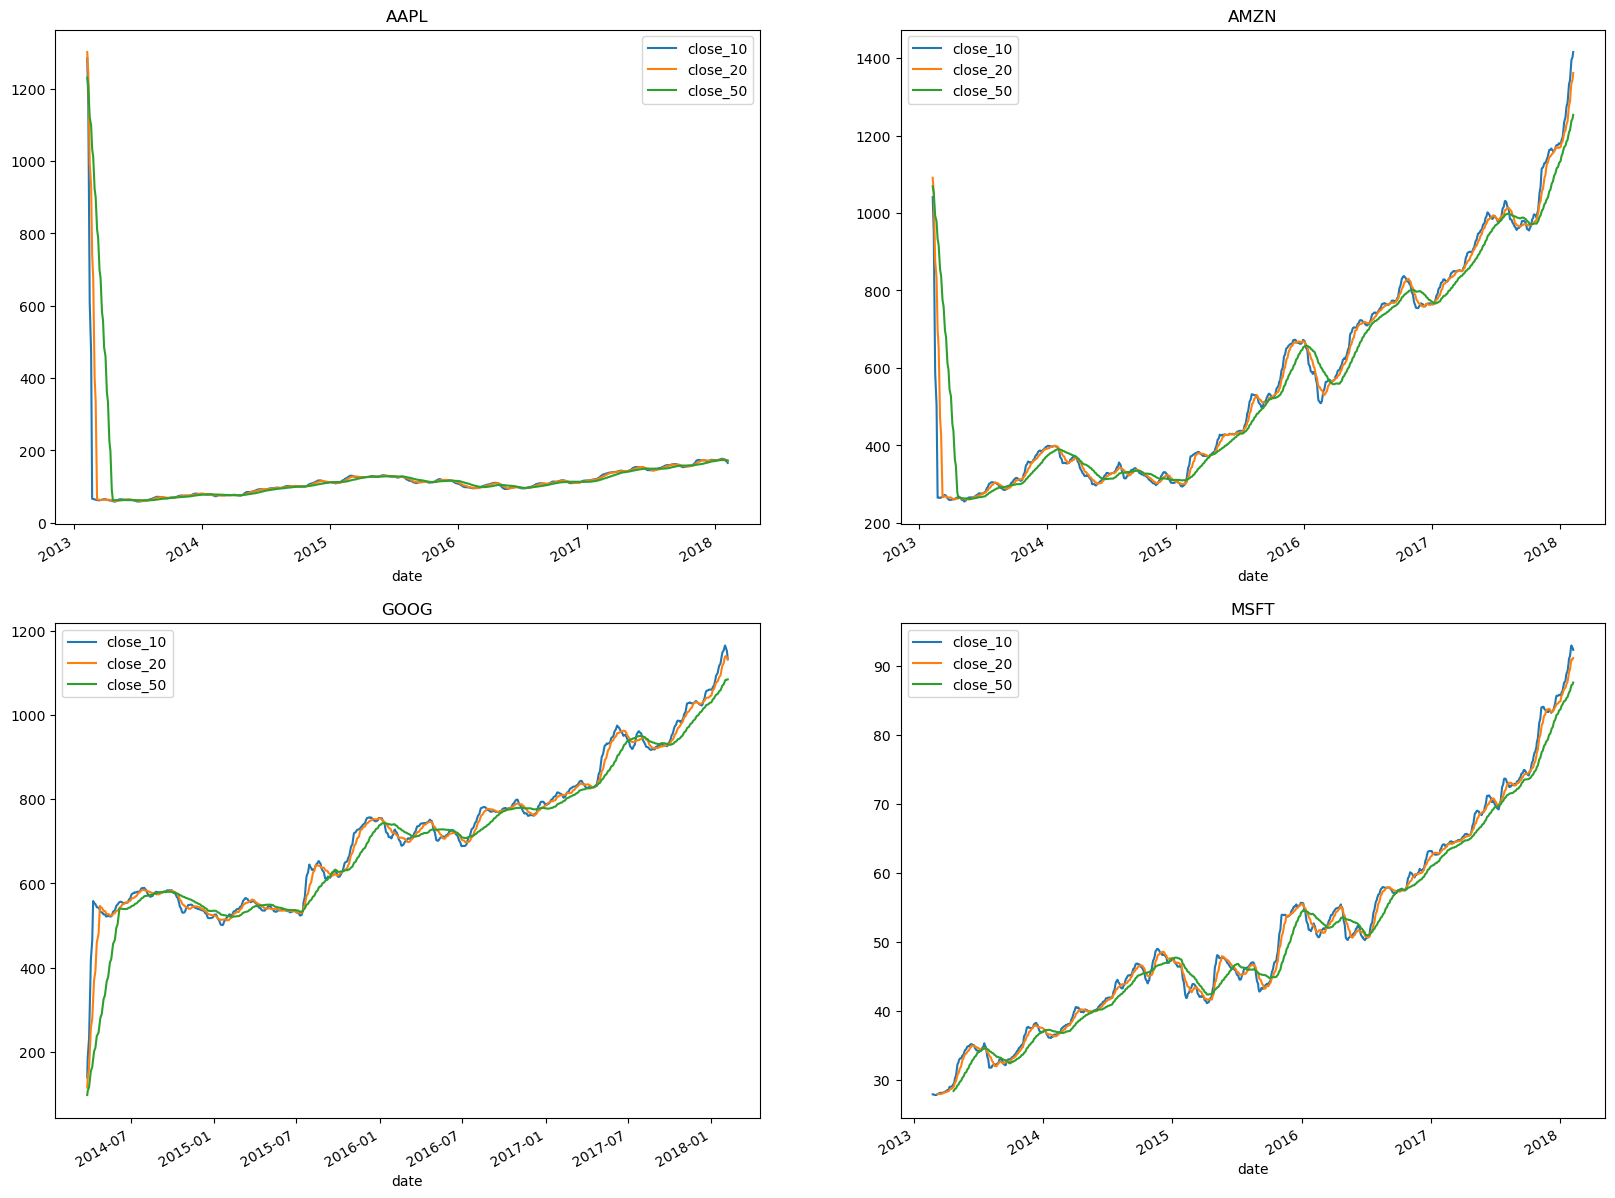

In [30]:
plt.figure(figsize=(20, 16))

for index, company in enumerate(tech_list, start=1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)
    # plt.show()

In [31]:
individual_stocks_path

'/Users/rubisc/workspace/data_analytics_real_world_projects/project_2_time_series_analysis/S&P_resources/individual_stocks_5yr/'

In [32]:
# company_list[0]

In [33]:
apple_df = pd.read_csv(company_list[0])

In [34]:
apple_df.head(3)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL


#### Observing closing price

In [35]:
apple_df['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [36]:
apple_df["Daily return in %"] = apple_df['close'].pct_change()*100

In [37]:
apple_df.head(3)

,date,open,high,low,close,volume,Name,Daily return in %
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658


In [38]:
import plotly.express as px

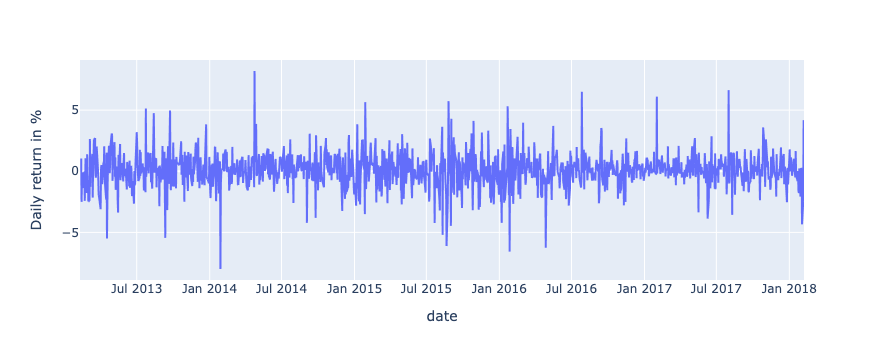

In [39]:
px.line(apple_df, x='date', y='Daily return in %')

#### Performing resampling analysis of closing price (in the context of time series. i.e. yearly, monthly, quarterly, etc.)

In [40]:
apple_df.dtypes

date                  object
open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
Name                  object
Daily return in %    float64
dtype: object

In [41]:
apple_df['date'] = pd.to_datetime(apple_df['date'])

In [42]:
apple_df.dtypes

date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
Name                         object
Daily return in %           float64
dtype: object

In [43]:
apple_df.set_index('date', inplace=True)

In [44]:
apple_df.head(2)

,open,high,low,close,volume,Name,Daily return in %
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235


In [45]:
apple_df['close'].resample('M').mean() # The M refers to month

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

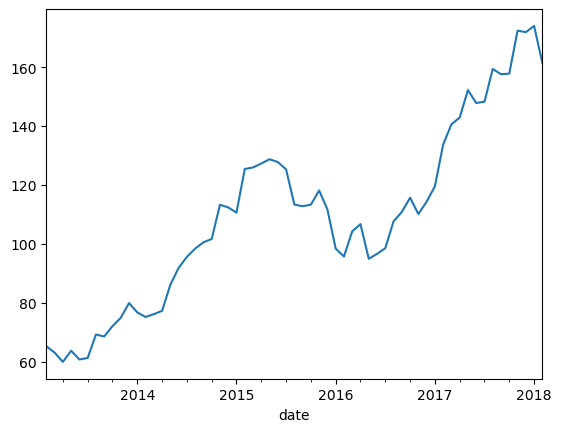

In [46]:
apple_df['close'].resample('M').mean().plot()

In [47]:
apple_df['close'].resample('Y').mean() # The Y refers to year

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

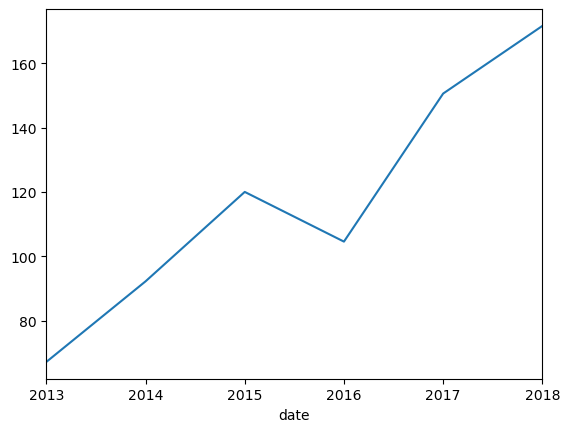

In [48]:
apple_df['close'].resample('Y').mean().plot()

In [49]:
apple_df['close'].resample('Q').mean() # The Q refers to quarter

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

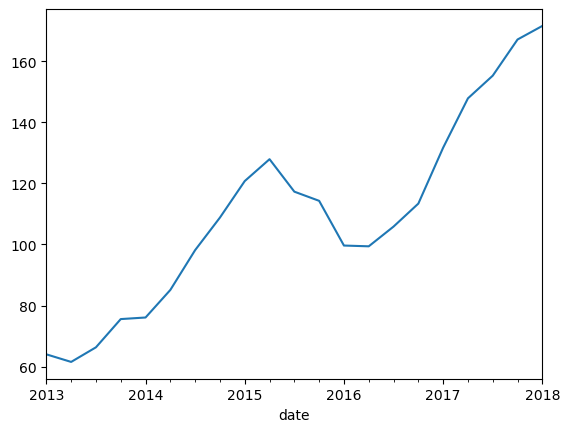

In [50]:
apple_df['close'].resample('Q').mean().plot()

#### Check if the closing prices of these companies (AAPL, AMZN, GOOG, MSFT) are correlated or not

Recommended: Use a scatterplot, pairwise scatterplot. (Remember pairplot when taking DS course?)

In [51]:
company_list

['/Users/rubisc/workspace/data_analytics_real_world_projects/project_2_time_series_analysis/S&P_resources/individual_stocks_5yr/AAPL_data.csv',
 '/Users/rubisc/workspace/data_analytics_real_world_projects/project_2_time_series_analysis/S&P_resources/individual_stocks_5yr/AMZN_data.csv',
 '/Users/rubisc/workspace/data_analytics_real_world_projects/project_2_time_series_analysis/S&P_resources/individual_stocks_5yr/GOOG_data.csv',
 '/Users/rubisc/workspace/data_analytics_real_world_projects/project_2_time_series_analysis/S&P_resources/individual_stocks_5yr/MSFT_data.csv']

In [52]:
aapl_data = pd.read_csv(company_list[0])
amzn_data = pd.read_csv(company_list[1])
goog_data = pd.read_csv(company_list[2])
msft_data = pd.read_csv(company_list[3])

In [53]:
closing_price = pd.DataFrame()

In [54]:
closing_price['apple_close'] = aapl_data['close']
closing_price['amzn_close'] = amzn_data['close']
closing_price['goog_close'] = goog_data['close']
closing_price['msft_close'] = msft_data['close']

In [55]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


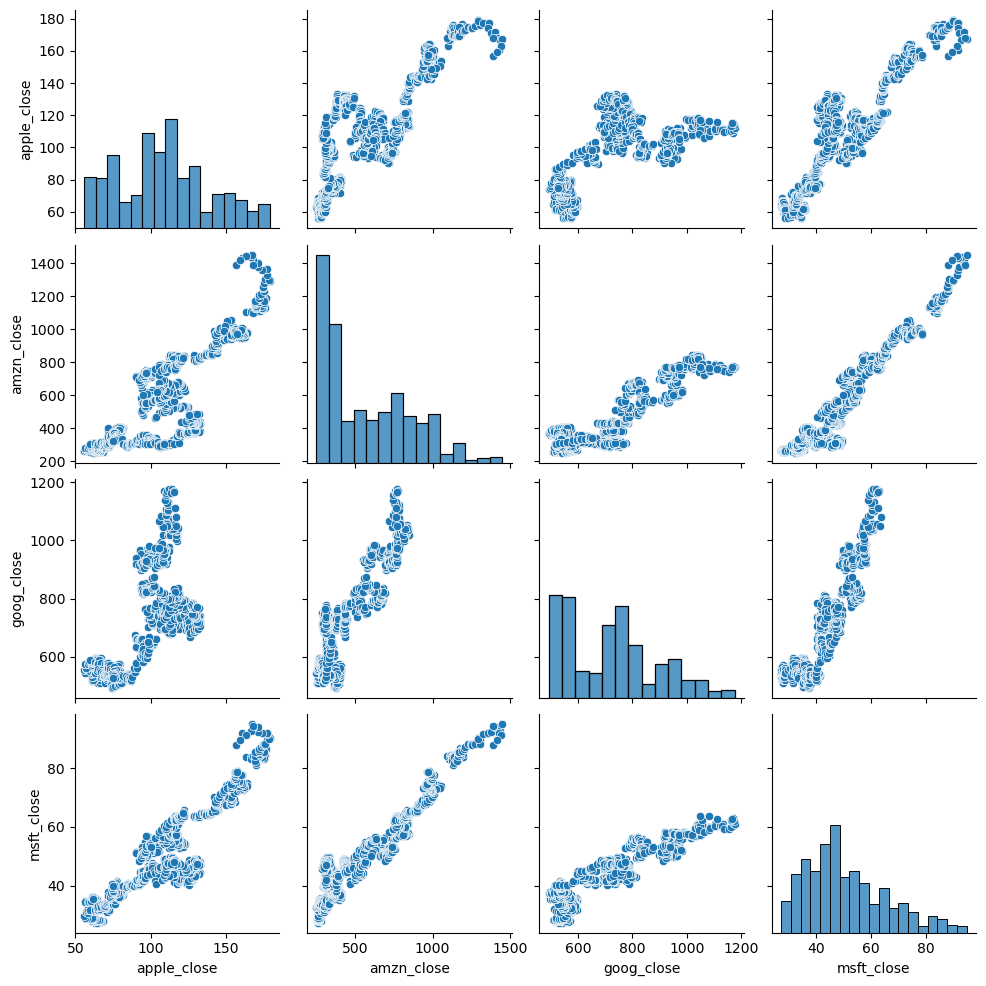

In [56]:
sns.pairplot(closing_price)

###### Note the strong correlation between Amazon and Microsoft closing prices

In [57]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.640522,0.899689
amzn_close,0.819078,1.000000,0.888456,0.955977
goog_close,0.640522,0.888456,1.000000,0.907011
msft_close,0.899689,0.955977,0.907011,1.000000


<AxesSubplot:>

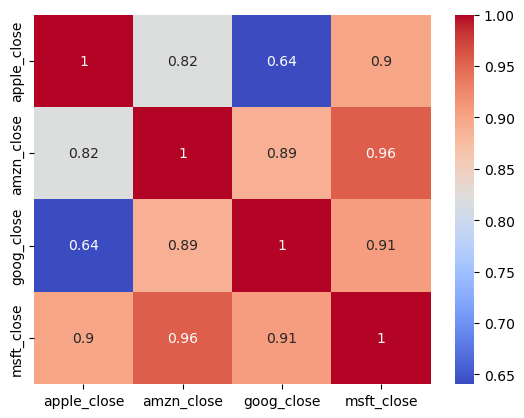

In [58]:
sns.heatmap(closing_price.corr(), cmap='coolwarm', annot=True)

#### Analyze whether daily change in closing price of stocks or daily returns in stocks are correlated or not

In [59]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [60]:
( closing_price['apple_close'] - closing_price['apple_close'].shift(1) )/ closing_price['apple_close'].shift(1) *100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [61]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1)*100

In [62]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [63]:
closing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

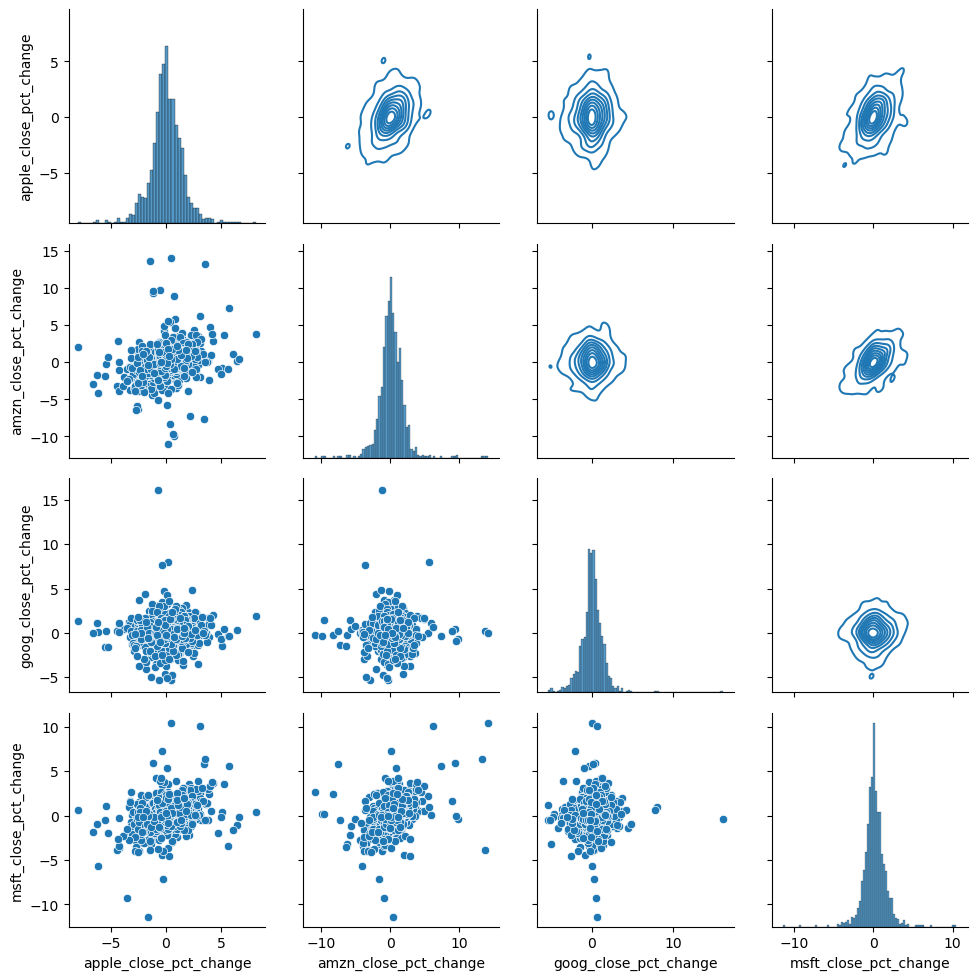

In [64]:
g = sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [65]:
closing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.287659,1.000000,0.027698,0.402678
goog_close_pct_change,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.366598,0.402678,0.038939,1.000000
